# Assignment 2

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

An NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`. The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this assignment, you must:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

The data you have been given is near **Ann Arbor, Michigan, United States**, and the stations the data comes from are shown on the map below.

In [1]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd
import numpy as np

def leaflet_plot_stations(binsize, hashid):

#     df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(binsize))
    df = pd.read_csv('../data/BinSize_d{}.csv'.format(binsize))

    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

    return mplleaflet.display()

leaflet_plot_stations(400,'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89')



In [2]:
# load data and check 
df = pd.read_csv('../data/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')
# df.Date = pd.to_datetime(df.Date)
print(df.head(5))
print(df.isna().sum()) # no null values 
print(df.describe(include='all'))
# df[df.Date=='2015-01-01']

            ID        Date Element  Data_Value
0  USW00094889  2014-11-12    TMAX          22
1  USC00208972  2009-04-29    TMIN          56
2  USC00200032  2008-05-26    TMAX         278
3  USC00205563  2005-11-11    TMAX         139
4  USC00200230  2014-02-27    TMAX        -106
ID            0
Date          0
Element       0
Data_Value    0
dtype: int64
                 ID        Date Element     Data_Value
count        165085      165085  165085  165085.000000
unique           24        4017       2            NaN
top     USC00200228  2010-01-09    TMAX            NaN
freq           8033          46   83063            NaN
mean            NaN         NaN     NaN      95.422116
std             NaN         NaN     NaN     123.515131
min             NaN         NaN     NaN    -343.000000
25%             NaN         NaN     NaN       0.000000
50%             NaN         NaN     NaN      94.000000
75%             NaN         NaN     NaN     189.000000
max             NaN         NaN     

## Approach 
1. Aggregate the data by date (for all station id ] 
2. Filter leap year data -  needs handling date 
3. Plot min and max data 
4. Find max/min temp of prev years - do it overall & month-wise 
5. Plot scatter plots based on broken records
6. Beautify Plots 
7. Refactor 

In [3]:
#  Aggregate
df.groupby(['ID','Date']).count().sort_values(['Element'])
print ((df.groupby(['ID','Date']).count().Element == 1).sum() ) 
df.head(3)
data = pd.pivot_table(df, index=['Date','ID'] , columns=['Element'], values= 'Data_Value' )
data.isna().sum() # matched 

# combine Ids
data = data.groupby('Date').agg({'TMAX':'max', 'TMIN':'min'})
data.reset_index(inplace= True)
data.head()

2025


,Date,TMAX,TMIN
0,2005-01-01,156.0,-56.0
1,2005-01-02,139.0,-56.0
2,2005-01-03,133.0,0.0
3,2005-01-04,39.0,-39.0
4,2005-01-05,33.0,-94.0


In [4]:
# Filter leap year data - needs handling date
data_all = data[data.Date.apply(lambda d : pd.to_datetime(d).day ==29 and  pd.to_datetime(d).month == 2) == False]

# Filter for year 2015 
data_2005 = data_all[data_all.Date.apply(lambda d : pd.to_datetime(d).year == 2015)]
data_2005.reset_index(inplace= True)
print(data_2005.head(3))
print(data_2005.tail(3))

   index        Date  TMAX   TMIN
0   3652  2015-01-01  11.0 -133.0
1   3653  2015-01-02  39.0 -122.0
2   3654  2015-01-03  39.0  -67.0
     index        Date   TMAX  TMIN
362   4014  2015-12-29  100.0 -39.0
363   4015  2015-12-30   67.0 -22.0
364   4016  2015-12-31   17.0 -56.0


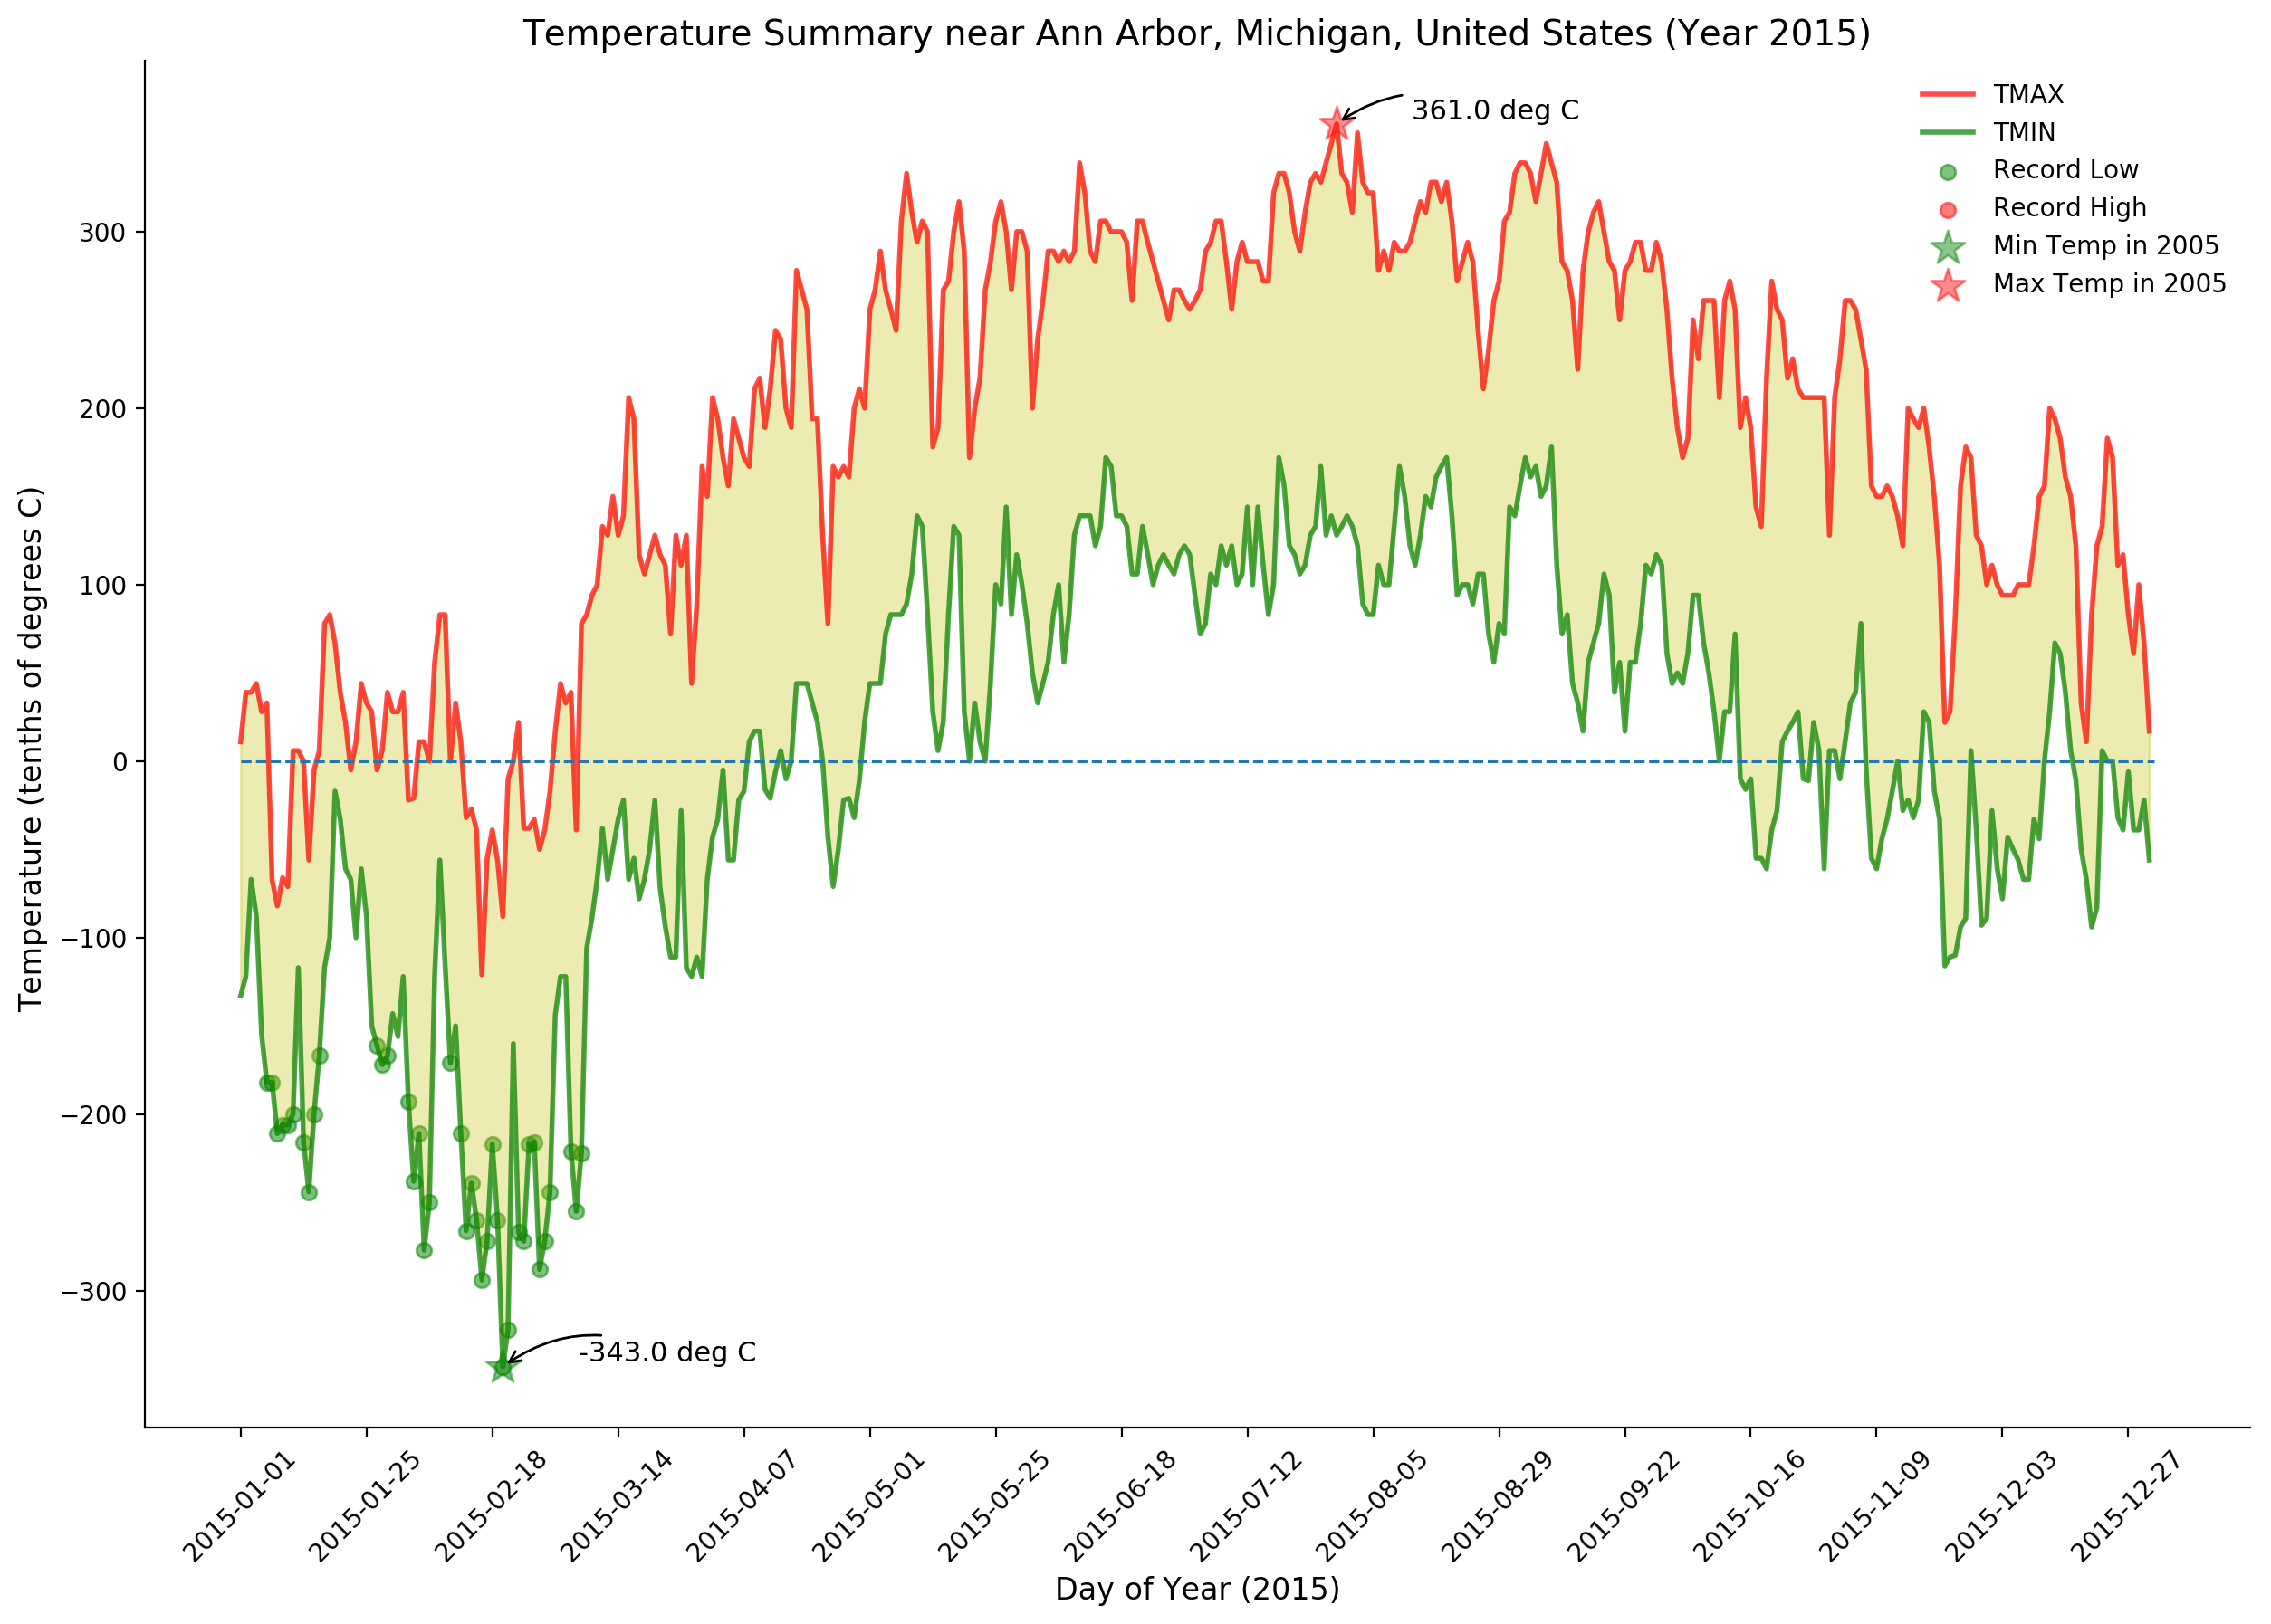

In [5]:
# figure 
plt.figure(figsize=(15,10), dpi= 200 )

# Plot min and max data
plt.plot(data_2005.Date, data_2005.TMAX, label= 'TMAX', lw = 2, color='r', alpha =.7);
plt.plot(data_2005.Date, data_2005.TMIN, label= 'TMIN', lw = 2, color='g', alpha =.7);

# Lowest and Highest Temperatures 
temp_max = data_all.iloc[data_all.TMAX.idxmax()].TMAX
temp_min = data_all.iloc[data_all.TMIN.idxmin()].TMIN

# Make scatter plot 
data_2005_rec_high = data_2005[data_2005.TMAX > temp_max]
data_2005_rec_low  = data_2005[data_2005.TMIN < temp_min]
plt.scatter(data_2005_rec_low.Date, data_2005_rec_low.TMIN, label ='Record Low' , color='g', alpha=.5 );
plt.scatter(data_2005_rec_high.Date,data_2005_rec_high.TMAX,label ='Record High', color='r', alpha=.5 );

# Mark Lowest of all temperatures 
lowest =  data_2005.iloc[data_2005.TMIN.idxmin()]
highest = data_2005.iloc[data_2005.TMAX.idxmax()]
plt.scatter(lowest.Date,lowest.TMIN   , marker = '*',s=200, c='g',alpha=.45 , label='Min Temp in 2005');
plt.scatter(highest.Date,highest.TMAX , marker = '*',s=200, c='r',alpha=.45 , label='Max Temp in 2005');

# annotate points 
plt.annotate(str(highest.TMAX)+' deg C',
             xy=(highest.Date,highest.TMAX),xycoords='data',
             xytext=(+30, +2), textcoords='offset points', fontsize=11,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.3"));
plt.annotate(str(lowest.TMIN)+' deg C',
             xy=(lowest.Date,lowest.TMIN),xycoords='data',
             xytext=(+30, +2), textcoords='offset points', fontsize=11,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.3"));

# set tics axis limits and legends 
plt.legend(loc='upper right', frameon=False);
plt.ylim(data_2005.TMIN.min()*1.1,data_2005.TMAX.max()*1.1);
plt.xticks(range(0,len(data_2005.Date),24),data_2005.Date.iloc[range(0,len(data_2005.Date),24)], rotation='45');

# fill color 
plt.fill_between(range(0,len(data_2005.Date)), data_2005.TMIN, data_2005.TMAX, color='y',alpha =.3);

# removes spines 
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# define 0 line 
plt.plot([0,365],[0,0], ls='--', lw = 1.1);

# Label on map 
plt.xlabel('Day of Year (2015)', fontsize= 12);
plt.ylabel('Temperature (tenths of degrees C) ', fontsize= 12);
plt.title('Temperature Summary near Ann Arbor, Michigan, United States (Year 2015)', fontsize=14);

# save 
plt.savefig('assignment2.png')


In [6]:
import datetime 
print('Last run On {}'.format(datetime.datetime.now().strftime("%d-%B-%Y")))

Last run On 20-May-2018
